# Programming Assignment 1: EE-5180

# Keshaw Choudhary EE21B069

In [38]:
# importing important modules
import numpy as np 
import matplotlib.pyplot as plt

Q1. Suppose that true θ∗ = 2.5 and θ∗0 = 3. For N = 300 input data points of x in range of [1, 5], write a
program in python to generate Dataset D.

In [39]:
# True parameters
theta_true = 2.5 #given
theta0_true = 3 #given

# Number of data points
N = 300 #given

x = np.linspace(1, 5, N) # Input data points x

y_tilde = theta_true * x + theta0_true # Desired output response

# Generate some noise for observed output
np.random.seed(0) #for better reproducibility
noise = np.random.normal(0, 1, N)

# Observed output response
y_observed = y_tilde + noise

dataset_D = list(zip(x, y_observed)) # Dataset D

# Printing first 5 data points for verification
print("Dataset D:")
for i in range(5):
    print(dataset_D[i])


Dataset D:
(1.0, 7.264052345967664)
(1.0133779264214047, 5.933602024420735)
(1.0267558528428093, 6.545627616212762)
(1.040133779264214, 7.841227647361992)
(1.0535117056856187, 7.501337254364014)


* Explanation :- 
This code snippet generates a dataset dataset_D consisting of N data points. It first creates input data points x ranging from 1 to 5 with N evenly spaced points. Then, it calculates the desired output response y_tilde using the true parameters theta_true and theta0_true. Some random noise is added to y_tilde to simulate real-world data. Finally, the observed output response y_observed is obtained by adding the noise to y_tilde, and the dataset dataset_D is formed by pairing each input x with its corresponding observed output y_observed.


Q2. Write a program to compute the total loss function for given dataset D.

In [40]:
def total_loss(theta, theta0, dataset):
    total_loss = 0 #Initialize
    for xi, y_tilde_i in dataset:
        y_pred = theta * xi + theta0
        total_loss += (y_pred - y_tilde_i) ** 2
    return 0.5 * total_loss / len(dataset)

# Example
theta_test = 2.5 #given
theta0_test = 3 #given
print("Total loss for test parameters:", total_loss(theta_test, theta0_test, dataset_D))


Total loss for test parameters: 0.5010804980267981


* Explanation :- This code snippet defines a function total_loss(theta, theta0, dataset) that calculates the total loss given parameters theta and theta0 and a dataset. It iterates over each data point in the dataset, calculates the predicted output using the given parameters, computes the squared error between the predicted output and the desired output, and sums up these squared errors. Finally, it returns half of the average of these squared errors, which is the total loss.

Q3. Compute gradient ∂Li/∂θ and ∂L/∂θ. Write a program to compute the gradient for given dataset D.

In [41]:
def gradient_theta(theta, theta0, dataset):
    grad_theta = 0
    for xi, y_tilde_i in dataset:
        y_pred = theta * xi + theta0
        grad_theta += (y_pred - y_tilde_i) * xi
    return grad_theta / len(dataset)

def gradient_theta0(theta, theta0, dataset):
    grad_theta0 = 0
    for xi, y_tilde_i in dataset:
        y_pred = theta * xi + theta0
        grad_theta0 += (y_pred - y_tilde_i)
    return grad_theta0 / len(dataset)

# Example
theta_test = 2.5 #given
theta0_test = 3 #given
print("Gradient with respect to theta:", gradient_theta(theta_test, theta0_test, dataset_D))
print("Gradient with respect to theta0:", gradient_theta0(theta_test, theta0_test, dataset_D))


Gradient with respect to theta: -0.007594436608695064
Gradient with respect to theta0: -0.027529575240886412


* Explanation :- This code snippet defines two functions gradient_theta(theta, theta0, dataset) and gradient_theta0(theta, theta0, dataset) to compute the gradients of the total loss function with respect to theta and theta0, respectively. These gradients are computed using the formulas derived from the partial derivatives of the loss function. The functions iterate over each data point in the dataset, compute the predicted output, and accumulate the gradients using the error between the predicted and desired outputs. Finally, the accumulated gradients are averaged over all data points and returned.

Q4. Write program of gradient descent algorithm for iteration T = 10000. Plot the cost function as function
of iteration.


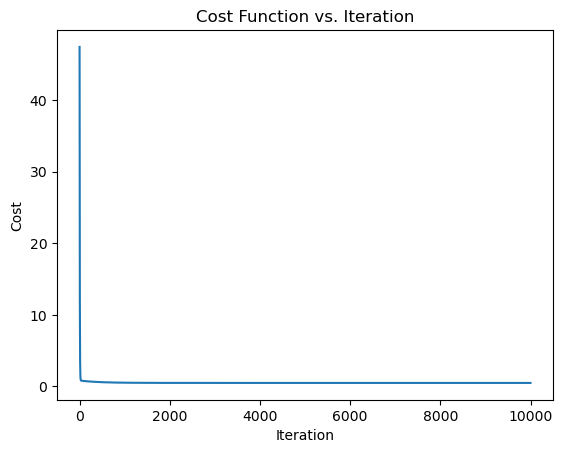

In [42]:
def gradient_descent(dataset, learning_rate, T):
    theta = 0 #Initialize theta
    theta0 = 0 #Initialize theta0
    costs = [] #Initialize costs list
    
    for i in range(T):
        # Compute gradients
        grad_theta = gradient_theta(theta, theta0, dataset)
        grad_theta0 = gradient_theta0(theta, theta0, dataset)
        
        # Update 
        theta -= learning_rate * grad_theta
        theta0 -= learning_rate * grad_theta0
        
        # Compute total loss and append to costs list
        cost = total_loss(theta, theta0, dataset)
        costs.append(cost)
    
    return theta, theta0, costs

# Example 
learning_rate = 0.01
T = 10000 #given
theta_opt, theta0_opt, costs = gradient_descent(dataset_D, learning_rate, T)

# Plot cost function as a function of iteration
plt.plot(range(T), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iteration')
plt.show()


* Explanation :- This code snippet implements the gradient descent algorithm to optimize the parameters theta and theta0 based on the given dataset. It initializes the parameters to zero and iterates for T iterations. In each iteration, it computes the gradients of the total loss function with respect to theta and theta0, updates the parameters using the gradients and the learning rate, and computes the total loss. The cost for each iteration is stored in a list costs. After T iterations, it returns the optimized parameters and the list of costs. Finally, it plots the cost function as a function of iteration using matplotlib.